<a href="https://colab.research.google.com/github/geun-hyoung/StockPredictionByTextMining/blob/main/txt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk

In [103]:
import pandas as pd
file_path = "combined_news_data.xlsx"
# tf_idf_result_path = "tf_idf_results.xlsx"

df = pd.read_excel(file_path)

# newspaper = pd.read_excel(file_path)['Publisher']
# year =  pd.read_excel(file_path)['Year']
df

,Publisher,Date,Title,Description
0,"{'href': 'https://www.theguardian.com', 'title...","Thu, 02 Jan 2020 08:00:00 GMT",Tesla may have been on Autopilot in California...,Tesla may have been on Autopilot in California...
1,"{'href': 'https://carbuzz.com', 'title': 'CarB...","Wed, 01 Jan 2020 08:00:00 GMT",Tesla Cybertruck Makes Music Video Debut - Car...,Tesla Cybertruck Makes Music Video Debut CarBuzz
2,"{'href': 'https://carbuzz.com', 'title': 'CarB...","Wed, 01 Jan 2020 08:00:00 GMT",All-New Tesla Model S Could Look Like This - C...,All-New Tesla Model S Could Look Like This Ca...
3,"{'href': 'https://en.globes.co.il', 'title': '...","Wed, 01 Jan 2020 08:00:00 GMT",Tesla setting up Israel R&D office - Globes - ...,Tesla setting up Israel R&D office - Globes G...
4,"{'href': 'https://electrek.co', 'title': 'Elec...","Wed, 01 Jan 2020 08:00:00 GMT",Tesla updates 2020 Supercharger map with new l...,Tesla updates 2020 Supercharger map with new l...
...,...,...,...,...
17781,"{'href': 'https://www.torquenews.com', 'title'...","Sat, 01 Oct 2022 07:00:00 GMT",What A Tesla Model 3 Could Mean For You - Torq...,What A Tesla Model 3 Could Mean For You Torqu...
17782,"{'href': 'https://www.hindustantimes.com', 'ti...","Sun, 02 Oct 2022 07:00:00 GMT",Want to work for Tesla? Elon Musk tweets askin...,Want to work for Tesla? Elon Musk tweets askin...
17783,"{'href': 'https://cnnespanol.cnn.com', 'title'...","Sat, 01 Oct 2022 07:00:00 GMT",El robot de Tesla caminó lentamente sobre el e...,El robot de Tesla caminó lentamente sobre el e...
17784,"{'href': 'https://www.thestreet.com', 'title':...","Sat, 01 Oct 2022 07:00:00 GMT",New Electric Vehicle Beats Tesla When it Comes...,New Electric Vehicle Beats Tesla When it Comes...


In [120]:
# Year 열 날짜 변환

df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y.%m.%d')

df['Date']

0        2020.01.02
1        2020.01.01
2        2020.01.01
3        2020.01.01
4        2020.01.01
            ...    
17781    2022.10.01
17782    2022.10.02
17783    2022.10.01
17784    2022.10.01
17785    2022.10.01
Name: Date, Length: 17786, dtype: object

In [69]:
import ast
# publisher 출판사만
# description에서 출판사 단어 제거

df['Publisher'] = df['Publisher'].apply(lambda x: ast.literal_eval(x)['title'] if pd.notnull(x) else x)
df['Description'] = df.apply(lambda row: row['Description'].replace(row['Publisher'], '').strip() if pd.notnull(row['Description']) else row['Description'], axis=1)

In [70]:
df = df.sort_values(by='Date')
df

,Publisher,Date,Title,Description,Preprocessed
1,CarBuzz,2020.01.01,Tesla Cybertruck Makes Music Video Debut - Car...,Tesla Cybertruck Makes Music Video Debut,cybertruck make music debut carbuzz
2,CarBuzz,2020.01.01,All-New Tesla Model S Could Look Like This - C...,All-New Tesla Model S Could Look Like This,all new model s could look like this carbuzz
3,Globes,2020.01.01,Tesla setting up Israel R&D office - Globes - ...,Tesla setting up Israel R&D office -,setting up israel r d office globes globes
4,Electrek,2020.01.01,Tesla updates 2020 Supercharger map with new l...,Tesla updates 2020 Supercharger map with new l...,supercharger map new locations electrek
5,Gulf News,2020.01.02,Why stop at just a Tesla Cybertruck when you c...,Why stop at just a Tesla Cybertruck when you c...,stop at just a cybertruck could also have a cy...
...,...,...,...,...,...
16961,Kiplinger's Personal Finance,2023.08.31,EV Tax Credit 2023: Everything You Need to Kno...,EV Tax Credit 2023: Everything You Need to Know,ev tax credit everything need to know kiplinge...
7348,GEO.de,2023.11.16,Europas Silvesterfluchten: Ruhige Ziele zum Ja...,Europas Silvesterfluchten: Ruhige Ziele zum Ja...,europas silvesterfluchten ruhige ziele zum jah...
1227,NETZWELT,2023.11.21,Liebe braucht keine Ferien | Sendetermine & St...,Liebe braucht keine Ferien | Sendetermine & St...,liebe braucht keine ferien sendetermine stream...
12743,Autovisie,2023.11.21,Waarom je in de wasstraat nooit het dure progr...,Waarom je in de wasstraat nooit het dure progr...,waarom je in de wasstraat nooit het dure progr...


In [71]:

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [89]:


# 불용어
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = set(ENGLISH_STOP_WORDS)

# 추가적인 불용어 카테고리별로 설정
general_stopwords = ['with', 'was', 'will', 'why', 'what', 'you', 'your', 'who', 'yet', 'years', 'world', 'working', 'work', 'we', 'when']
brand_stopwords = ['tesla', 'volvo', 'volkswagen', 'xpeng']
tech_stopwords = ['video', 'updates', 'youtuber', 'youtube', 'windows', 'wifi', 'wireless', 'watching', 'watch', 'windowbreaking', 'window', 'wing']
car_stopwords = ['vehicles', 'truckers', 'transportation', 'trucks', 'vehicle']
date_stopwords = ['january', 'fabruary', 'march','april','may','june','july','agust','september','october','november','december']
other_stopwords = ['do']

# 모든 추가 불용어를 한 리스트에 합치기
all_additional_stopwords = general_stopwords + brand_stopwords + tech_stopwords + car_stopwords+date_stopwords + other_stopwords

for stopword in all_additional_stopwords:
  custom_stop_words.add(stopword)


In [122]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.lancaster import LancasterStemmer
lemmatizer = WordNetLemmatizer()
# stemmer = EnglishStemmer()
# stemmer = LancasterStemmer()
# stemmer = nltk.stem.PorterStemmer()
# lemmatizer = WordNetLemmatizer()

noun_words = ['beans', 'murphy','rockets',
              'producevehicle','games','airlines','operators','facilities',
              'videos','claims','masks','nations','vehicles','ploblems','photos',
              'sits','relations','covers','hands','tensions','capabilities','nations','requests','endorsements',
              'teams', 'ploblems','areas','streets','signs','possiblities','workers','sales','adopters','developments',
              'companies','clubs','dashboards','powerwalls','panalties','challenges','tasks','machines','households',
              'negotiations','politics','overseas','homeowners','wars','movies','autospies','paneles','withdraws',
              'margins','automakers','nuevos','flaws','deepfakes','believers','angeles','spacers','deliveries','fails']
verb_words = ['have','waived','involving','abundoning','contribute','engaged','recalled','intensifying','led','curves',
              'received', 'charges', 'investigating', 'intensifying', 'said','retreating','considering','remains','began','displayed',
              'fired','lined','depanding','blamed','killing','sitting','opted','enticing','reviewing','contends','missed','balancing',
              'anticipated','jumped','delievered','shifted','killed','concerning','arrived','defects','argued','disclosed',
              'explained','appears','stopped','depending','battered','thinking','pressured','slowing','tumbling','tensifying',
              'explained','restarts','admitted','demands','totaled','demonstrates','opposing','interested','acting','taken','braking',
              'peaking','dethroned','met','guessed','developer','outstanding','performing','loaded','rides','launched','allows',
              'thrilled','operated','refusing','slumped','affected','appeared','removing','saying','related','troubled',
              'advanced','raised','killed','defects','crewed','performing','leaving','got','explains','raising',
              'inspires','injured','sales','powered','pulled','cutting','fleeing','creating','growing','coming',
              'leasing','promising','revealed','nailed','did','linking','tuned','optimizes','badged',
              'receives','patched','encourageing','thought','recommends','combined','endangered','counterfeiting',
              'challenging','owned','missing','creates','closing','won','hinting','billing','rolling','nears','breaking','given',
              'commemorating','receiving','going','targeted','kicking','replaced','seeking','promotes','taking',
              'stealing','spotted','celebrating','extended','preserving','allows','cutting','including','positioning',
              'extends','enabled','fixing','replacing','promotes','sends','flying','replanting','responds','rumoured',
              'installed','inspired','isolating','designed','earnings','jolted','adding','picking','running','rolls',
              'acquires','electrifying','sustaining','redesigned','committed','branded','launched','prepares','worked',
              'zoomed','shares','earnings','confirmed','making', 'makes','abandoning','abandoned','abandons','delievering',
              'replaces','sent','says']
adject_words = ['nearest','safer','older','worse','slower','lower','hottest','coolest','effectively','originally','cheaper']

import re

# 단어 전처리 함수
def preprocess_word(text):
    text = text.lower()

    words = re.findall(r'\b[a-zA-Z]+\b', text)

    preprocessed_sentence = ' '.join([word for word in words if word not in all_additional_stopwords])

    tokens = nltk.word_tokenize(preprocessed_sentence)

    # 여러 개의 특정 단어를 명사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='n') if word in noun_words else word for word in tokens]
    # 여러 개의 특정 단어를 동사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='v') if word in verb_words else word for word in tokens]
    # 여러 개의 특정 단어를 형용사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='a') if word in adject_words else word for word in tokens]

    return ' '.join(tokens)



In [123]:
sentences = df['Description']

# tfidf
vectorizer = TfidfVectorizer(max_features=None,stop_words=list(custom_stop_words),preprocessor=preprocess_word)
X = vectorizer.fit_transform(sentences)

# 단어 목록
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)

# 결과를 엑셀 파일로 저장
# tfidf_df.to_excel('tfidf_results.xlsx', index=True)

tfidf_df


,aaa,aaditya,aaj,aan,aandeel,aankoopadvies,aantal,aap,aapl,aave,...,zuhause,zukunft,zulassungen,zum,zur,zurich,zweeds,zwei,zwischen,zx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
preprocessed_sentences = df['Description'].apply(preprocess_word)
df['Preprocessed'] = preprocessed_sentences
df

,Publisher,Date,Title,Description,Preprocessed
0,"{'href': 'https://www.theguardian.com', 'title...",2020.01.02,Tesla may have been on Autopilot in California...,Tesla may have been on Autopilot in California...,have been on autopilot in california crash whi...
1,"{'href': 'https://carbuzz.com', 'title': 'CarB...",2020.01.01,Tesla Cybertruck Makes Music Video Debut - Car...,Tesla Cybertruck Makes Music Video Debut CarBuzz,cybertruck make music debut carbuzz
2,"{'href': 'https://carbuzz.com', 'title': 'CarB...",2020.01.01,All-New Tesla Model S Could Look Like This - C...,All-New Tesla Model S Could Look Like This Ca...,all new model s could look like this carbuzz
3,"{'href': 'https://en.globes.co.il', 'title': '...",2020.01.01,Tesla setting up Israel R&D office - Globes - ...,Tesla setting up Israel R&D office - Globes G...,setting up israel r d office globes globes
4,"{'href': 'https://electrek.co', 'title': 'Elec...",2020.01.01,Tesla updates 2020 Supercharger map with new l...,Tesla updates 2020 Supercharger map with new l...,supercharger map new locations electrek
...,...,...,...,...,...
17781,"{'href': 'https://www.torquenews.com', 'title'...",2022.10.01,What A Tesla Model 3 Could Mean For You - Torq...,What A Tesla Model 3 Could Mean For You Torqu...,a model could mean for torque news
17782,"{'href': 'https://www.hindustantimes.com', 'ti...",2022.10.02,Want to work for Tesla? Elon Musk tweets askin...,Want to work for Tesla? Elon Musk tweets askin...,want to for elon musk tweets asking techies to...
17783,"{'href': 'https://cnnespanol.cnn.com', 'title'...",2022.10.01,El robot de Tesla caminó lentamente sobre el e...,El robot de Tesla caminó lentamente sobre el e...,el robot de lentamente sobre el escenario en e...
17784,"{'href': 'https://www.thestreet.com', 'title':...",2022.10.01,New Electric Vehicle Beats Tesla When it Comes...,New Electric Vehicle Beats Tesla When it Comes...,new electric beats it comes to the environment...


In [106]:
df_a = pd.DataFrame({
    'Description': df['Description'],
    'Preprocessed': df['Preprocessed']
})

df_a

,Description,Preprocessed
0,Tesla may have been on Autopilot in California...,have been on autopilot in california crash whi...
1,Tesla Cybertruck Makes Music Video Debut CarBuzz,cybertruck make music debut carbuzz
2,All-New Tesla Model S Could Look Like This Ca...,all new model s could look like this carbuzz
3,Tesla setting up Israel R&D office - Globes G...,setting up israel r d office globes globes
4,Tesla updates 2020 Supercharger map with new l...,supercharger map new locations electrek
...,...,...
17781,What A Tesla Model 3 Could Mean For You Torqu...,a model could mean for torque news
17782,Want to work for Tesla? Elon Musk tweets askin...,want to for elon musk tweets asking techies to...
17783,El robot de Tesla caminó lentamente sobre el e...,el robot de lentamente sobre el escenario en e...
17784,New Electric Vehicle Beats Tesla When it Comes...,new electric beats it comes to the environment...


model      0.031739
musk       0.018991
elon       0.017154
car        0.013253
news       0.012869
             ...   
sigurno    0.000015
nikoli     0.000015
niste      0.000015
stvari     0.000015
kopao      0.000015
Length: 18750, dtype: float64


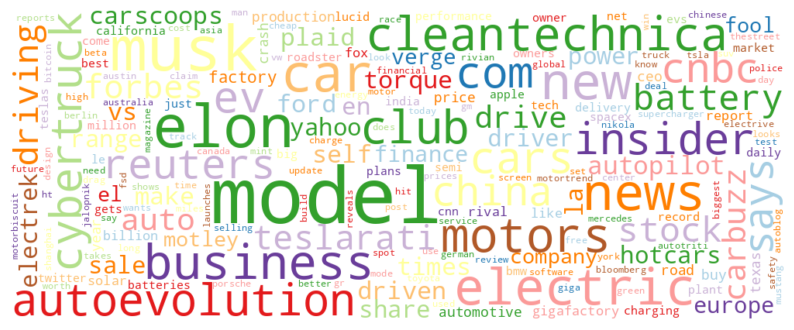

In [107]:
### 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성 함수
def generate_wordcloud(tfidf_df):
    # 단어와 해당하는 TF-IDF 값을 딕셔너리로 변환

    tfidf_counter = tfidf_df.T.mean(axis=1)
    print(tfidf_counter.sort_values(ascending=False))
    # 워드 클라우드 생성
    wordcloud = WordCloud(width=1000, height=400, background_color='white',min_font_size=5,max_font_size=100,colormap = "Paired").generate_from_frequencies(tfidf_counter)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(tfidf_df)



In [108]:

# 문장에서 상위 키워드 추출 함수
def extract_keywords(sentence, all_keywords, max_keywords=None):
    tfidf_values = vectorizer.transform([sentence]).toarray()[0]
    sorted_indices = tfidf_values.argsort()[-max_keywords:][::-1]
    keywords = [all_keywords[idx] for idx in sorted_indices]
    return ', '.join(keywords)

# 문장을 벡터화하여 모든 키워드 추출
all_keywords = vectorizer.get_feature_names_out()

# # 키워드 분석 결과 얻기
# keywords_per_sentence = [extract_keywords(sentence, all_keywords, max_keywords=5) for sentence in sentences]
# keywords_per_sentence

In [109]:
import numpy as np
# 엑셀 파일에 결과 추가 함수
def add_results_to_excel(sentences, excel_filename):
    # 키워드 분석 결과 얻기
    keywords_per_sentence = [extract_keywords(sentence, all_keywords, max_keywords=5) for sentence in sentences]

    # 뉴스 -키워드 데이터 엑셀로
    results_1 = pd.DataFrame({
        'Sentences': sentences,
        'Keywords' : keywords_per_sentence
    })
    results_1.to_excel('News_Keys_results.xlsx', index = False)

    # 결과를 DataFrame으로 변환
    # results_df = pd.DataFrame({
    #     'Newspaper': newspaper,
    #     'Year' : date_result,
    #     'Sentences': sentences,
    #     'Sentiment': sentiments,
    #     'Keywords' : keywords_per_sentence
    # })

    # 결과를 엑셀 파일에 저장
    # results_df.to_excel(excel_filename, index=False)

# 엑셀 파일에 결과 추가
add_results_to_excel(sentences, 'analysis_results.xlsx')

----------------------
날짜별 키워드 추출

In [125]:
# 날짜별 키워드

date_keyword_result = {
    'Date': df['Date'],
    'Sentences': preprocessed_sentences,
}

dk_df = pd.DataFrame(date_keyword_result)

grouped_data = dk_df.groupby('Date')['Sentences'].apply(lambda x: ', '.join(x)).reset_index()
# grouped_data = dk_df.groupby('Date')['Sentences'].agg([' '.join, 'count']).reset_index()

grouped_data.to_excel('date_text.xlsx', index = False)
grouped_data

,Date,Sentences
0,2020.01.01,"cybertruck make music debut carbuzz, all new m..."
1,2020.01.02,have been on autopilot in california crash whi...
2,2020.01.03,to provide movie online game in its cars khmer...
3,2020.01.04,i crash one of raise questions about s autopil...
4,2020.01.05,minimalist cybertruck inspire russian cyberhou...
...,...,...
1104,2023.08.09,mejores brokers para invertir en bolsa invezz
1105,2023.08.31,ev tax credit everything need to know kiplinge...
1106,2023.11.16,europas silvesterfluchten ruhige ziele zum jah...
1107,2023.11.21,liebe braucht keine ferien sendetermine stream...


In [111]:

keywords_per_date_sentence = [extract_keywords(sentence, all_keywords, max_keywords=10)  for sentence in grouped_data['Sentences']]

date_keyword_result = pd.DataFrame({
    'Date': grouped_data['Date'],
    'Keywords' : keywords_per_date_sentence
})
date_keyword_result
date_keyword_result.to_excel('date_keywords_results.xlsx', index = False)

----

감성분석 결과 추가

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from textblob import TextBlob

In [85]:
df['Description'].isnull().sum()

0

In [112]:

from collections import defaultdict
from textblob import TextBlob

# 감성분석 점수 및 키워드를 저장할 딕셔너리 초기화
description_sentiment_scores = defaultdict(float)
keywords_sentiment_scores = defaultdict(float)
keywords_dict = defaultdict(list)

# 감성 단어 개수를 저장할 딕셔너리 초기화
description_uncertainty_count = defaultdict(int)
description_litigious_count = defaultdict(int)
description_constraining_count = defaultdict(int)
description_superfluous_count = defaultdict(int)
description_weakmodal_count = defaultdict(int)
description_positive_count = defaultdict(int)
description_negative_count = defaultdict(int)

keywords_uncertainty_count = defaultdict(int)
keywords_litigious_count = defaultdict(int)
keywords_constraining_count = defaultdict(int)
keywords_superfluous_count = defaultdict(int)
keywords_weakmodal_count = defaultdict(int)
keywords_positive_count = defaultdict(int)
keywords_negative_count = defaultdict(int)

# Loughran-McDonald 사전 로드
sentiment_df = pd.read_csv('LM-SA-2020.csv')

# 감성별 사전 초기화
uncertainty_dict = defaultdict(int)
litigious_dict = defaultdict(int)
constraining_dict = defaultdict(int)
superfluous_dict = defaultdict(int)
weakmodal_dict = defaultdict(int)
positive_dict = defaultdict(int)
negative_dict = defaultdict(int)

for _, row in sentiment_df.iterrows():
    word, sentiment = row['word'], row['sentiment']
    if sentiment == 'Uncertainty':
        uncertainty_dict[word] = 1
    elif sentiment == 'Litigious':
        litigious_dict[word] = 1
    elif sentiment == 'Constraining':
        constraining_dict[word] = 1
    elif sentiment == 'Superfluous':
        superfluous_dict[word] = 1
    elif sentiment == 'WeakModal':
        weakmodal_dict[word] = 1
    elif sentiment == 'Positive':
        positive_dict[word] = 1
    elif sentiment == 'Negative':
        negative_dict[word] = -1

# 감성 분석 함수
def sentiment_analysis(sentence, sentiment_dict):
    words = sentence.split()
    sentiment_score = sum(sentiment_dict[word] for word in words if word in sentiment_dict)
    return sentiment_score

# 감성 단어 개수를 세는 함수
def count_sentiment_words(sentences, sentiment_dict):
    count = 0
    for sentence in sentences:
        words = sentence.split()
        count += sum(1 for word in words if word in sentiment_dict)
    return count

# 날짜별로
for date, group in df.groupby('Date'):
    # 'Description' 컬럼이 비어 있지 않은 경우만 처리
    if not group['Description'].isna().all():
        descriptions = group['Description']
        # 불용어로만 이루어진 문장을 제외
        descriptions = [desc for desc in descriptions if not all(word in custom_stop_words for word in desc.split())]

        if descriptions:
            # 그룹의 Description을 합친 텍스트를 TF-IDF 변환
            tfidf = vectorizer.fit_transform(descriptions)

            # TF-IDF 값이 높은 10개의 키워드 추출
            keywords = [word for word, score in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)[:10]]
            keywords_dict[date] = keywords

            # 감성분석 점수 계산 (키워드의 감성 점수 합)
            keywords_sentiment_scores[date] = sum(sum(sentiment_analysis(keyword, sentiment) for sentiment in [positive_dict, negative_dict]) for keyword in keywords)

            # 'Description'의 전체 텍스트를 대상으로 한 감성분석 점수 계산 후 소수점 5째 자리에서 반올림
            description_sentiment_scores[date] = round(sum(sentiment_analysis(' '.join(descriptions), sentiment) for sentiment in [positive_dict, negative_dict])/len(descriptions), 5)

            # 감성 단어 개수 계산
            description_uncertainty_count[date] = count_sentiment_words(descriptions, uncertainty_dict)
            description_litigious_count[date] = count_sentiment_words(descriptions, litigious_dict)
            description_constraining_count[date] = count_sentiment_words(descriptions, constraining_dict)
            description_superfluous_count[date] = count_sentiment_words(descriptions, superfluous_dict)
            description_weakmodal_count[date] = count_sentiment_words(descriptions, weakmodal_dict)
            description_positive_count[date] = count_sentiment_words(descriptions, positive_dict)
            description_negative_count[date] = count_sentiment_words(descriptions, negative_dict)

            # 감성 단어 개수 계산
            keywords_uncertainty_count[date] = count_sentiment_words(keywords, uncertainty_dict)
            keywords_litigious_count[date] = count_sentiment_words(keywords, litigious_dict)
            keywords_constraining_count[date] = count_sentiment_words(keywords, constraining_dict)
            keywords_superfluous_count[date] = count_sentiment_words(keywords, superfluous_dict)
            keywords_weakmodal_count[date] = count_sentiment_words(keywords, weakmodal_dict)
            keywords_positive_count[date] = count_sentiment_words(keywords, positive_dict)
            keywords_negative_count[date] = count_sentiment_words(keywords, negative_dict)



In [113]:
senti_df = pd.DataFrame({
    'Date': grouped_data['Date']
})
senti_df['Description_Sentiment_Score'] = senti_df['Date'].map(description_sentiment_scores)
senti_df['Keywords_Sentiment_Score'] = senti_df['Date'].map(keywords_sentiment_scores)

senti_df.to_excel("senti_score.xlsx")

In [114]:
senti_df

,Date,Description_Sentiment_Score,Keywords_Sentiment_Score
0,"Fri, 01 Apr 2022 07:00:00 GMT",0.00000,0
1,"Fri, 01 Jan 2021 08:00:00 GMT",0.00000,0
2,"Fri, 01 Jul 2022 07:00:00 GMT",-0.73333,-1
3,"Fri, 01 May 2020 07:00:00 GMT",-0.47368,0
4,"Fri, 01 Oct 2021 07:00:00 GMT",-0.13333,-1
...,...,...,...
1343,"Wed, 30 Mar 2022 17:17:05 GMT",0.00000,0
1344,"Wed, 30 Nov 2022 08:00:00 GMT",-0.20000,-1
1345,"Wed, 30 Sep 2020 07:00:00 GMT",-0.38462,-2
1346,"Wed, 31 Aug 2022 07:00:00 GMT",-0.41667,0


['Description_Sentiment_Score']

In [115]:
pos = len(senti_df[senti_df['Description_Sentiment_Score'] > 0])/len(senti_df)
nue = len(senti_df[senti_df['Description_Sentiment_Score'] == 0])/len(senti_df)
neg = len(senti_df[senti_df['Description_Sentiment_Score'] < 0])/len(senti_df)
print("긍정비율",pos)
print("중립비율",nue)
print("부정비율",neg)


긍정비율 0.07566765578635015
중립비율 0.28486646884273
부정비율 0.6394658753709199


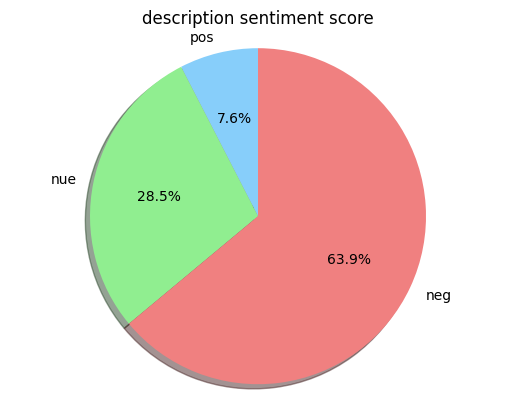

In [116]:
# 긍정부정중립 비율 그래프
colors = [ 'lightskyblue','lightgreen','lightcoral',]

plt.title('description sentiment score')

plt.pie([pos,nue,neg], labels = ['pos','nue','neg'], autopct='%1.1f%%', startangle=90, colors = colors, shadow=True)
plt.axis('equal')

# 그래프 보여주기
plt.show()

['Keywords_Sentiment_Score']

In [118]:
pos = len(senti_df[senti_df['Keywords_Sentiment_Score'] > 0])/len(senti_df)
nue = len(senti_df[senti_df['Keywords_Sentiment_Score'] == 0])/len(senti_df)
neg = len(senti_df[senti_df['Keywords_Sentiment_Score'] < 0])/len(senti_df)
print("긍정비율",pos)
print("중립비율",nue)
print("부정비율",neg)


긍정비율 0.12240356083086053
중립비율 0.48293768545994065
부정비율 0.39465875370919884


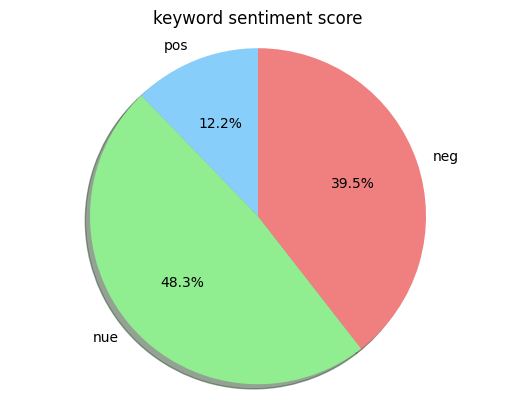

In [119]:
# 긍정부정중립 비율 그래프
plt.title('keyword sentiment score')

plt.pie([pos,nue,neg], labels = ['pos','nue','neg'], autopct='%1.1f%%', startangle=90,colors = colors,shadow=True)
plt.axis('equal')

# 그래프 보여주기
plt.show()

-- tsla 주가 데이터 추가 --

In [ ]:
!pip install yfinance
!pip install -U pandas-profiling

In [ ]:
import yfinance as yf

In [ ]:
tsla_df = yf.download('TSLA', start='2019-12-31', end='2022-12-31')

In [ ]:
tsla_df['Date'] = tsla_df.index.strftime('%Y-%m-%d')

In [ ]:
tsla_df

In [ ]:
# 해당 영업일의 종가 변동 비율(전일 대비)
tsla_df['Close_ratio'] = tsla_df['Close'].pct_change()
tsla_df.head()

In [ ]:
# 날짜 - senti
# print(senti_df)
# senti_df.set_index('Date', inplace=True)
senti_df.drop('Keywords_Sentiment_Score',axis = 1)


In [ ]:
senti_df.index = pd.to_datetime(senti_df.index)

result_a = pd.merge(tsla_df, senti_df, left_index=True, right_index=True, how='inner')
# result_a

result_a = result_a.sort_index()

In [ ]:
result_a

In [ ]:
# close_ratio / transaction_ratio

plt.figure(figsize=(10, 5))

# 첫 번째 Y 축에 데이터 플로팅
fig, ax1 = plt.subplots()
ax1.plot(result_a.index.tolist(), result_a['Close_ratio'], 'b-', label='sin(x)')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('ratio', color='b')
ax1.tick_params('y', colors='b')

# 두 번째 Y 축 생성
ax2 = ax1.twinx()
ax2.plot(result_a.index.tolist(), result_a['Description_Sentiment_Score'], 'r-', label='cos(x)')
ax2.set_ylabel('score', color='r')
ax2.tick_params('y', colors='r')

plt.xlim(pd.Timestamp('2022-01-01'),pd.Timestamp('2022-03-01'))

plt.grid(True)
plt.show()

---